In [22]:
import xarray as xr
import pandas as pd
import numpy as np
import cartopy as cp
import matplotlib.pyplot as plt

In [10]:
def consecutive(da, thresh=1, cum_type='cdd'):
    count = 0; overall_counter = []
    for i,j in enumerate(da):
        if cum_type == 'cwd':
            count = count+1 if da[i] >= thresh else 0
        elif cum_type == 'cdd':
            count = count+1 if da[i] < thresh else 0
        overall_counter.append(count)
    return max(overall_counter)


In [12]:
Data = xr.open_dataset('GPCC_Ghana_precip.nc').precip * 86400
years = list( set( Data['time.year'].values ) )

#Create a New Blank Array of Dimension Similar to the Spatial Grids and Time Aggregation ('Yearly') Grids
size = list(Data.shape); size[0] = len(years)
cwd = np.zeros(size)
cdd = np.zeros(size)

for i, yr in enumerate(years):
    for a in np.arange(cwd.shape[1]):
        for b in np.arange(cwd.shape[2]):
            cwd[i,a,b] = consecutive( Data.sel(time=str(yr))[:,a,b].values, thresh=1, cum_type='cwd' )
            cdd[i,a,b] = consecutive( Data.sel(time=str(yr))[:,a,b].values, thresh=1, cum_type='cdd' )

In [14]:
cwd

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., 24., 24., ...,  0.,  0.,  0.],
        [25., 25., 24., ...,  0.,  0.,  0.],
        ...,
        [14., 27., 27., ..., 35., 37., 37.],
        [14., 14., 14., ..., 35., 40., 40.],
        [14., 14., 13., ..., 25., 28., 30.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., 20., 20., ...,  0.,  0.,  0.],
        [24., 20., 19., ...,  0.,  0.,  0.],
        ...,
        [ 7., 11.,  8., ..., 24., 24., 26.],
        [ 7., 10., 11., ..., 21., 24., 21.],
        [ 6.,  9.,  8., ..., 18., 18., 24.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., 19., 19., ...,  0.,  0.,  0.],
        [26., 26., 19., ...,  0.,  0.,  0.],
        ...,
        [ 9.,  5.,  6., ..., 24., 28., 26.],
        [ 8.,  8.,  6., ..., 24., 35., 26.],
        [ 8.,  8.,  8., ..., 11., 15., 15.]],

       ...,

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., 19., 19., ...,  0.,  0.,  0.],
        [19., 19., 19., ...,  0.,  0.,  0.

In [16]:
#CWD DataArray
new_CWD = xr.DataArray(data=cwd,
     dims=list(Data.dims),
     coords=dict(
         lon= Data.lon,
         lat=Data.lat,
         time=pd.to_datetime(years, format='%Y'),
     ),
    name = 'CWD',
     attrs=dict(
         description="Consecutive Wet Days",
         units="days",
     ),
)


In [18]:
# CDD DataArray
new_CDD = xr.DataArray(data=cdd,
     dims=list(Data.dims),
     coords=dict(
         lon= Data.lon,
         lat=Data.lat,
         time=pd.to_datetime(years, format='%Y'),
     ),
    name = 'CDD',
     attrs=dict(
         description="Consecutive Dry Days",
         units="days",
     ),
)


In [21]:
new_CDD

<xarray.DataArray 'CDD' (time: 34, lat: 16, lon: 10)>
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., 16., 16., ...,  0.,  0.,  0.],
        [16., 16., 16., ...,  0.,  0.,  0.],
        ...,
        [59., 47., 59., ..., 59., 59., 59.],
        [59., 59., 59., ..., 59., 59., 59.],
        [59., 59., 60., ..., 59., 59., 59.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., 39., 39., ...,  0.,  0.,  0.],
        [39., 39., 39., ...,  0.,  0.,  0.],
        ...,
        [42., 48., 58., ..., 70., 87., 54.],
        [42., 48., 59., ..., 70., 70., 56.],
        [48., 91., 89., ..., 87., 70., 70.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., 17., 17., ...,  0.,  0.,  0.],
        [17., 17., 17., ...,  0.,  0.,  0.],
        ...,
...
        ...,
        [59., 58., 59., ..., 50., 50., 50.],
        [58., 58., 59., ..., 50., 50., 50.],
        [58., 58., 59., ..., 50., 50., 50.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., 10.,  9., ...,  0.,  0.,  0.],
        [ 8.,  9.,  9., ...,  0.,  0.,  0.],
        ...,
        [50., 50., 51., ..., 41., 58., 74.],
        [50., 50., 51., ..., 42., 42., 76.],
        [50., 50., 51., ..., 42., 42., 42.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., 28., 28., ...,  0.,  0.,  0.],
        [28., 28., 28., ...,  0.,  0.,  0.],
        ...,
        [52., 61., 52., ..., 60., 62., 68.],
        [60., 61., 52., ..., 62., 62., 62.],
        [60., 60., 60., ..., 64., 60., 60.]]])
Coordinates:
  * lon      (lon) float64 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float64 4.25 4.75 5.25 5.75 6.25 ... 10.25 10.75 11.25 11.75
  * time     (time) datetime64[ns] 1982-01-01 1983-01-01 ... 2015-01-01
Attributes:
    description:  Consecutive Dry Days
    units:        days

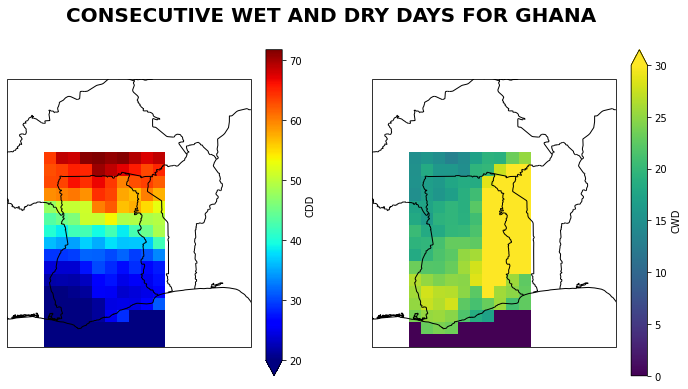

In [35]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6), subplot_kw={'projection':cp.crs.PlateCarree()})
new_CDD.mean('time').plot(cmap='jet', ax = axes[0], vmin=20)
axes[0].coastlines()
axes[0].add_feature(cp.feature.BORDERS)
axes[0].set_extent([-5,5,4,15])


new_CWD.mean('time').plot(cmap='viridis', ax = axes[1], vmax=30)
axes[1].coastlines()
axes[1].add_feature(cp.feature.BORDERS)
axes[1].set_extent([-5,5,4,15])

plt.suptitle('CONSECUTIVE WET AND DRY DAYS FOR GHANA',fontweight='bold',fontsize=20)

fig.savefig('project plots/consecutivewetanddrydays.png', bbox_inches='tight', dpi=500)
